In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
%matplotlib notebook

In [2]:
df = pd.read_csv('imm_trends.csv')
df = df.drop(labels=['isPartial', 'visas', 'residence permit'],axis='columns')
df

,date,Immigration
0,2015-08-02,27
1,2015-08-09,27
2,2015-08-16,30
3,2015-08-23,30
4,2015-08-30,32
...,...,...
255,2020-06-21,25
256,2020-06-28,21
257,2020-07-05,24
258,2020-07-12,23


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df['date']

0     2015-08-02
1     2015-08-09
2     2015-08-16
3     2015-08-23
4     2015-08-30
         ...    
255   2020-06-21
256   2020-06-28
257   2020-07-05
258   2020-07-12
259   2020-07-19
Name: date, Length: 260, dtype: datetime64[ns]

In [40]:
maximums = df.sort_values(by='Immigration', ascending=False).head()
ann1 = maximums.iloc[1][0] # '2016-11-06'
ann2 = maximums.iloc[0][0] # '2017-01-29'
ann3 = maximums.iloc[2][0] # '2018-06-17'

Timestamp('2016-11-06 00:00:00')

<IPython.core.display.Javascript object>


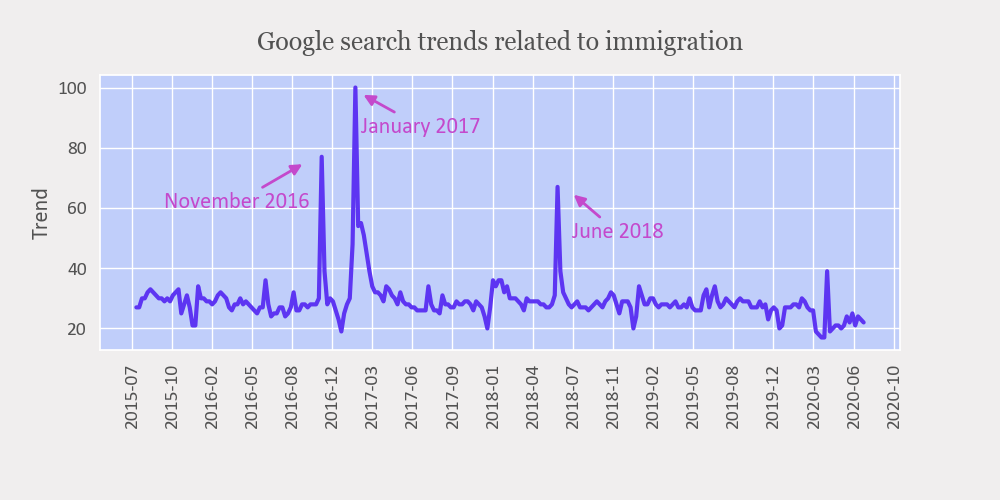

In [115]:
sns.set(rc={'axes.facecolor':'#c0cefa'})
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
ann_color = '#c449cc'

fig, ax = plt.subplots(facecolor='#f0eeee')
fig.set_size_inches(10, 5)
ax.plot('date', 'Immigration', data=df, color='#5d35f2', linewidth=3)
plt.tight_layout()

# Format dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)

# Set a title
ttl = ax.set_title('Google search trends related to immigration', fontsize=18, pad=18, color=font_color, **csfont)
ttl.set_position([.5, 1.02])

# Annotations
arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)
ax.annotate('November 2016', 
            xy=(df['date'][60], 75), # arrow position (x, y)
            xytext=(df['date'][10], 60), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)
ax.annotate('January 2017', 
            xy=(df['date'][80], 98), # arrow position (x, y)
            xytext=(df['date'][80], 85), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)
ax.annotate('June 2018', 
            xy=(df['date'][155], 65), # arrow position (x, y)
            xytext=(df['date'][155], 50), # text position (x, y)
            color=ann_color,
            arrowprops=arrowprops,
            fontsize=16,
            **hfont)

# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

# Create labels and ticks, set their color and font
ax.set_ylabel('Trend', color=font_color, fontsize=16, **hfont)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

In [117]:
filename = 'mpl-line-chart'
plt.savefig(filename+'.png', facecolor=('#f0eeee'))